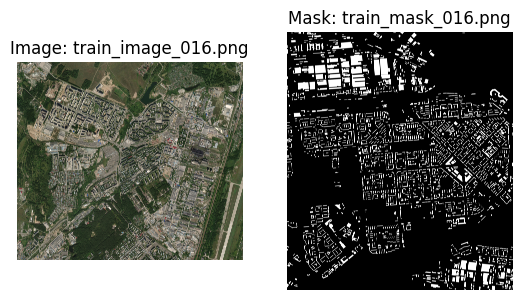

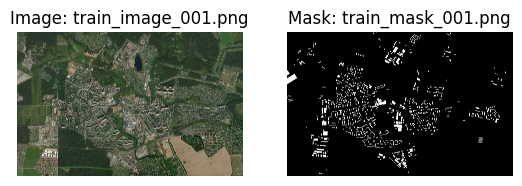

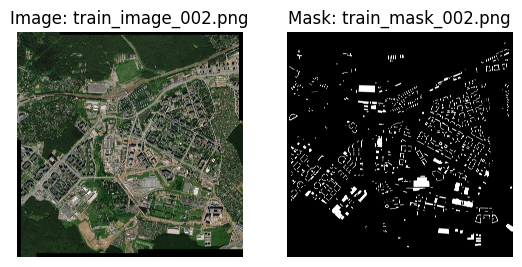

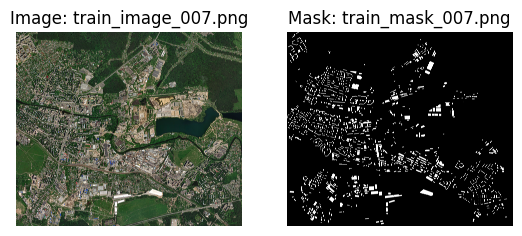

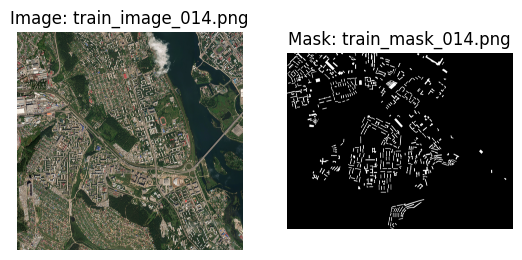

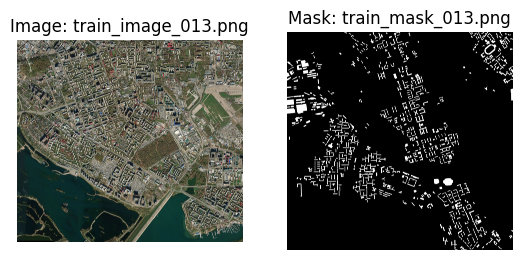

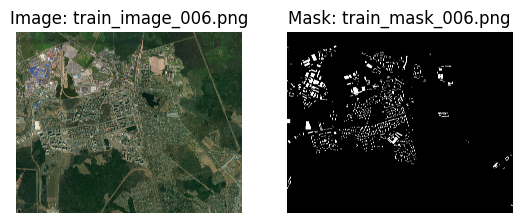

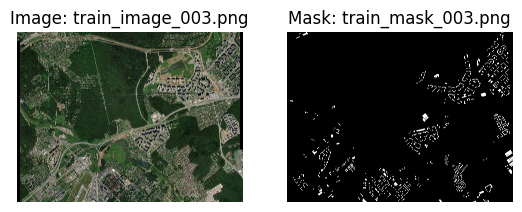

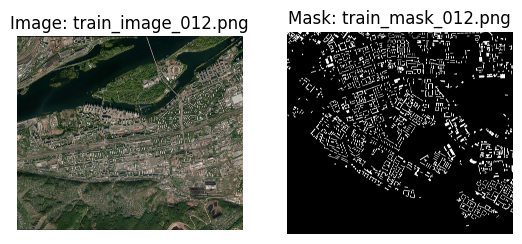

OSError: image file is truncated

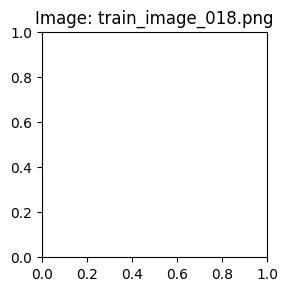

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_with_masks(images_folder, masks_folder):
    # List all image files in the images folder
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.png')]

    # Loop through each image file
    for image_file in image_files:
        # Load and display the image
        image_path = os.path.join(images_folder, image_file)
        image = Image.open(image_path)
        plt.subplot(1, 2, 1)
        plt.title(f'Image: {image_file}')
        plt.imshow(image)
        plt.axis('off')

        # Construct the corresponding mask file name
        mask_file = f"{image_file.replace('train_image_', 'train_mask_')}"
        mask_path = os.path.join(masks_folder, mask_file)
        
        # Load and display the corresponding mask
        mask = Image.open(mask_path)
        plt.subplot(1, 2, 2)
        plt.title(f'Mask: {mask_file}')
        plt.imshow(mask, cmap='gray')  # Assuming the mask is a grayscale image
        plt.axis('off')

        # Show the images
        plt.show()

# Specify the paths to the images and masks folders
images_folder = 'train/images'
masks_folder = 'train/masks'

# Display all images with their corresponding masks
display_images_with_masks(images_folder, masks_folder)


In [15]:
from datasets import load_dataset

ds = load_dataset("keremberke/satellite-building-segmentation", name="full")
example = ds['train'][0]

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Extracting data files: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
Generating train split: 6764 examples [00:06, 999.90 examples/s] 
Generating validation split: 1934 examples [00:01, 1078.22 examples/s]
Generating test split: 967 examples [00:00, 992.20 examples/s] 


In [16]:
example

{'image_id': 1188,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'width': 500,
 'height': 500,
 'objects': {'id': [16708, 16709, 16710, 16711, 16712, 16713, 16714],
  'area': [27303, 6738, 3053, 2643, 9768, 4691, 6054],
  'bbox': [[266.0, 365.0, 205.60000610351562, 132.8000030517578],
   [0.0, 232.0, 83.8499984741211, 80.36000061035156],
   [0.0, 447.0, 57.720001220703125, 52.900001525878906],
   [457.0, 164.0, 42.63999938964844, 61.9900016784668],
   [188.0, 305.0, 104.1500015258789, 93.79000091552734],
   [422.0, 439.0, 77.54000091552734, 60.5099983215332],
   [118.0, 451.0, 124.19000244140625, 48.75]],
  'segmentation': [[[427.5,
     438.8999938964844,
     436.0,
     432.0,
     441.6000061035156,
     432.8999938964844,
     456.20001220703125,
     422.79998779296875,
     455.3999938964844,
     420.5,
     465.3999938964844,
     413.6000061035156,
     472.0,
     394.70001220703125,
     453.70001220703125,
     367.20001220703125,
     432.200

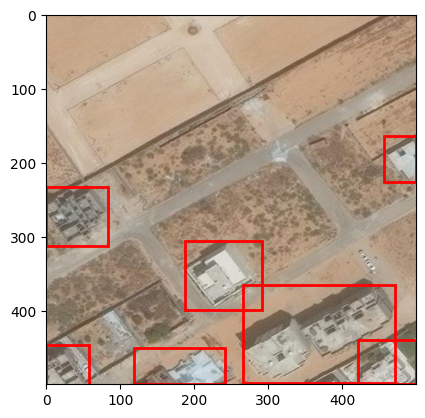

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Get the image from the example
image = example['image']

# Create a figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Get bounding boxes information
bboxes = example['objects']['bbox']

# Add bounding boxes to the image
for bbox in bboxes:
    x, y, width, height = bbox
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Show the image with bounding boxes
plt.show()

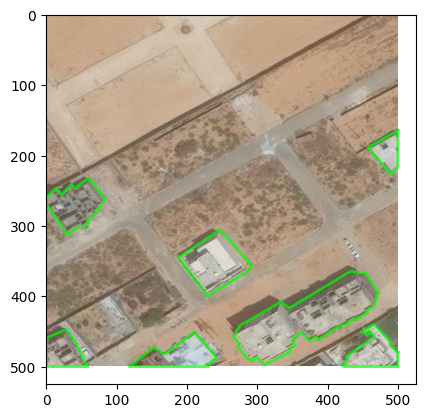

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import numpy as np

# Get the image from the example
image = example['image']

# Create a figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Get segmentation information
segmentations = example['objects']['segmentation']

# Add segmentations to the image
for segmentation in segmentations:
    for polygon in segmentation:
        poly = np.array(polygon).reshape(-1, 2)
        x, y = poly[:, 0], poly[:, 1]
        ax.plot(x, y, color='lime', linewidth=2, alpha=0.7)

# Show the image with segmentations
plt.show()